In [ ]:
#importing the csv file
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
file_path="/content/drive/MyDrive/wheat_crop_data.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())

   OBJECTID        LON        LAT           Region   Country    District  \
0    120130  33.041667 -17.625000  Southern_Africa  Zimbabwe       Barue   
1    128324  29.458333 -21.541667  Southern_Africa  Zimbabwe  Beitbridge   
2    128325  29.541667 -21.541667  Southern_Africa  Zimbabwe  Beitbridge   
3    128326  29.625000 -21.541667  Southern_Africa  Zimbabwe  Beitbridge   
4    128327  29.708333 -21.541667  Southern_Africa  Zimbabwe  Beitbridge   

   cropland  DTW_min  DTW_max  GWP_min  ...  pv_cost_min  pv_cost_max  \
0     134.4       14        7      0.1  ...         2000         3000   
1     503.5       14        7      0.1  ...         2000         3000   
2     986.8      125       50      0.1  ...         2000         3000   
3    1655.6       14        7      0.1  ...         2000         3000   
4    1325.2       14        7      0.1  ...         2000         3000   

   discount_rate_low discount_rate_high     FERT  PV_size(kWp)  \
0              0.148              0.19

In [ ]:
#Dropping duplicates and checking for null values
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

OBJECTID          0
LON               0
LAT               0
Region            0
Country           0
                 ..
PV_size(kWp)      0
NPC_annual_min    0
NPC_annual_max    0
Crop_price_min    0
Crop_price_max    0
Length: 106, dtype: int64


In [ ]:
#in the column crop_price_min there some inf values
df['Crop_price_min'] = df['Crop_price_min'].replace([np.inf, -np.inf], np.nan)

df = df.dropna(subset=['NPC_annual_min', 'Crop_price_min'])

In [ ]:
#removeing the leading or trailing spaces
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [ ]:
inf_npc = np.isinf(df['NPC_annual_min']).sum()
inf_crop = np.isinf(df['Crop_price_min']).sum()

print(f"Inf in NPC_annual_min: {inf_npc}")
print(f"Inf in Crop_price_min: {inf_crop}")

Inf in NPC_annual_min: 0
Inf in Crop_price_min: 0


Correlation between NPC Annual Min and Crop Price Min: -0.04
P-value: 0.0000


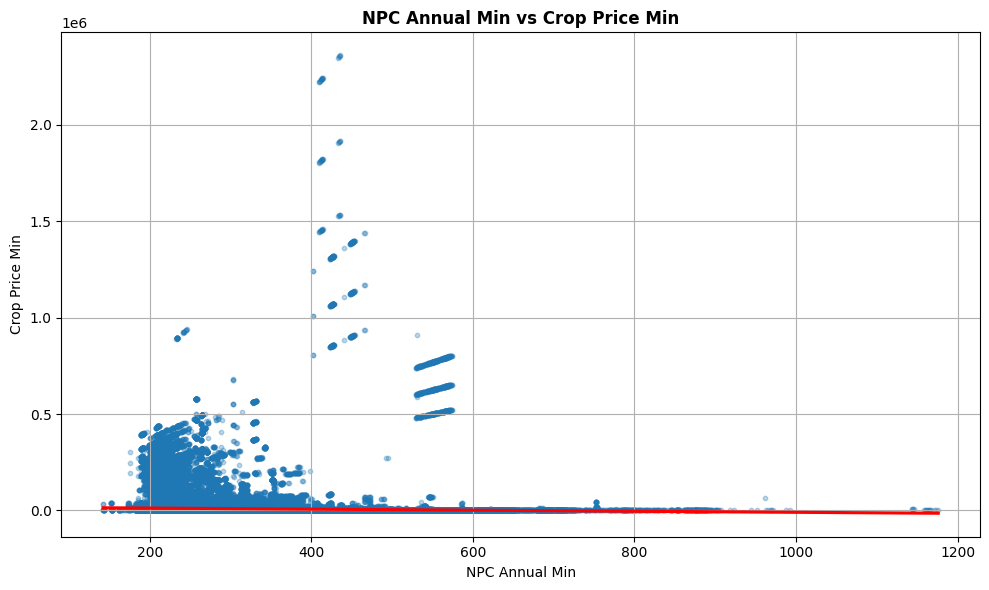

In [ ]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['NPC_annual_min'], df['Crop_price_min'])
print(f"Correlation between NPC Annual Min and Crop Price Min: {corr:.2f}")
print(f"P-value: {p:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='NPC_annual_min',
    y='Crop_price_min',
    scatter_kws={'alpha': 0.3, 's': 10},
    line_kws={'color': 'red'},
)

plt.title('NPC Annual Min vs Crop Price Min',color='Black',fontweight='bold')
plt.xlabel('NPC Annual Min')
plt.ylabel('Crop Price Min')
plt.grid(True)
plt.tight_layout()
plt.show()

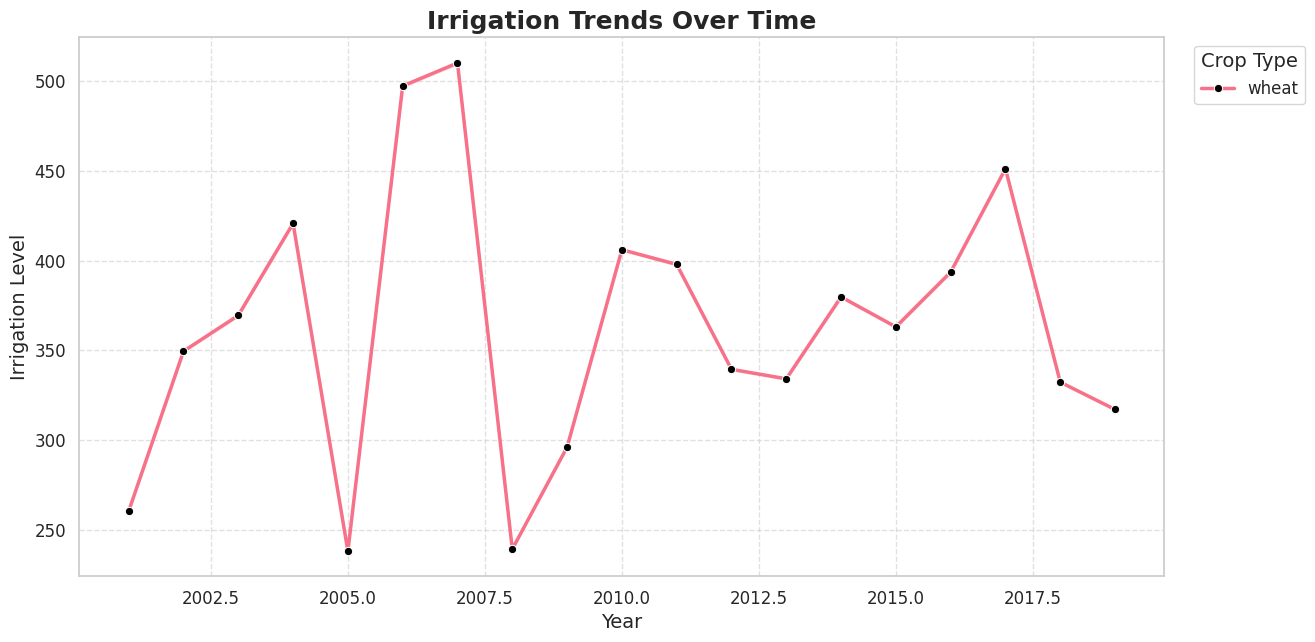

In [ ]:
years = [str(year) for year in range(2001, 2020)]
irr_columns = [f'irr_{year}' for year in range(2001, 2020)]
df_melted = df.melt(id_vars=['Crop', 'Region'], value_vars=irr_columns,
                     var_name='Year', value_name='Irrigation')


df_melted['Year'] = df_melted['Year'].str.extract(r'(\d+)').astype(int)


sns.set_theme(style="whitegrid", palette="husl")


plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='Year', y='Irrigation', hue='Crop', marker='o', linewidth=2.5,markerfacecolor='black',color='#FF8C00')


plt.title("Irrigation Trends Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Irrigation Level", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Crop Type", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')


plt.grid(True, linestyle="--", alpha=0.6)


plt.show()

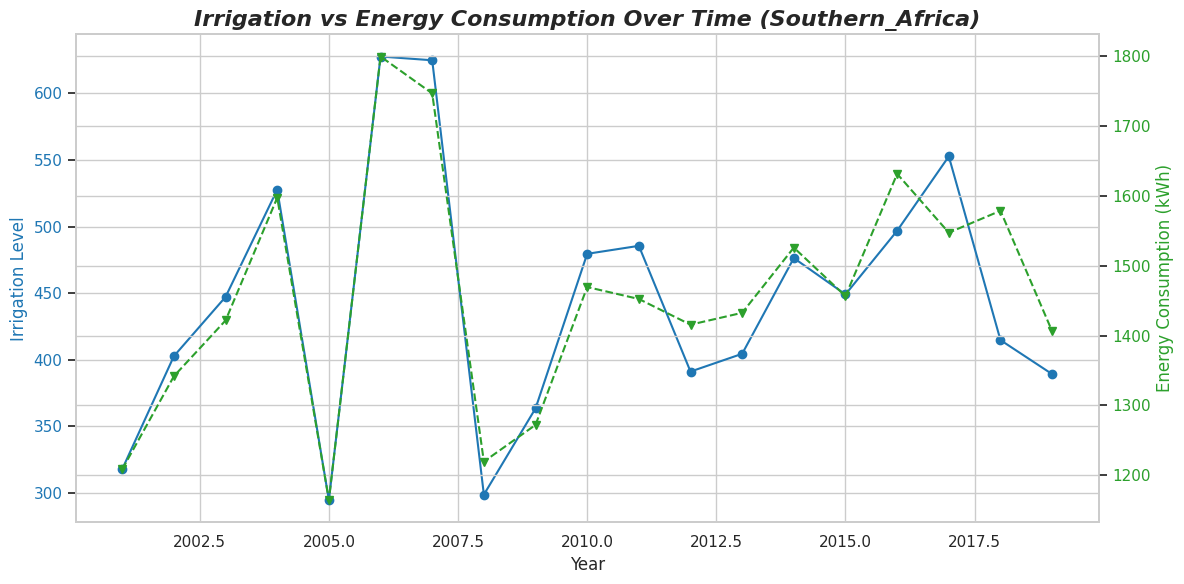

In [ ]:
region_name = "Southern_Africa"
df_filtered = df[df["Region"] == region_name]
years = list(range(2001, 2020))
irr_columns = [f'irr_{year}' for year in years]
energy_columns = [f'kwh.min_{year}' for year in years]


irr_avg = df_filtered[irr_columns].mean()
energy_avg = df_filtered[energy_columns].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.set_xlabel("Year")
ax1.set_ylabel("Irrigation Level", color="tab:blue",fontname="DejaVu Sans")
ax1.plot(years, irr_avg, marker="o", linestyle="-", color="tab:blue", label="Irrigation")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Energy Consumption (kWh)", color="tab:green",fontname="DejaVu Sans")
ax2.plot(years, energy_avg, marker="v", linestyle="--", color="tab:green", label="Energy Consumption")
ax2.tick_params(axis="y", labelcolor="tab:green")


plt.title(f"Irrigation vs Energy Consumption Over Time ({region_name})", fontsize=16, fontweight="heavy",fontstyle="oblique",fontname="DejaVu Sans")
fig.tight_layout()
plt.grid(True)


plt.show()

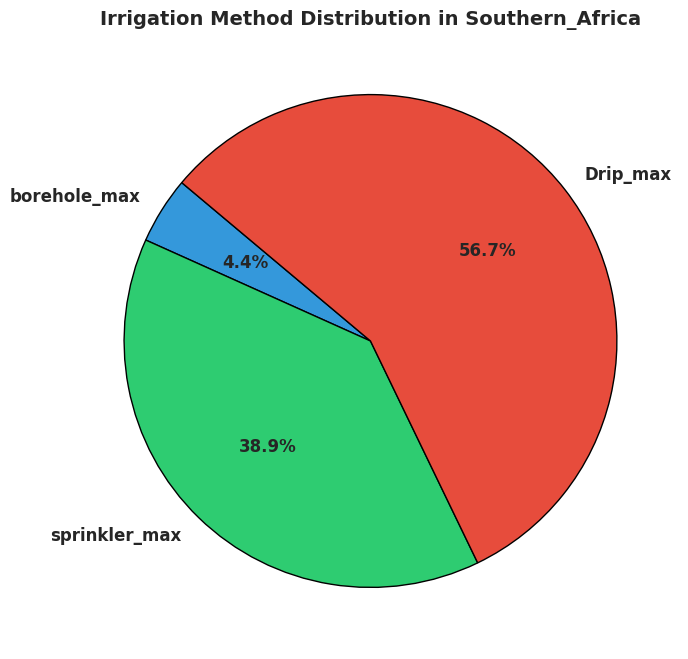

In [ ]:
selected_region = "Southern_Africa"
df_region = df[df["Region"] == selected_region]


irrigation_types = ["borehole_max", "sprinkler_max", "Drip_max"]
avg_irrigation_values = df_region[irrigation_types].mean()

plt.figure(figsize=(8, 8))
color_scheme = ["#3498db", "#2ecc71", "#e74c3c"]
plt.pie(avg_irrigation_values, labels=irrigation_types, autopct="%1.1f%%",
colors=color_scheme, startangle=140, wedgeprops={"edgecolor": "black"},
textprops={"fontsize": 12, "weight": "bold"})

plt.title(f"Irrigation Method Distribution in {selected_region}", fontsize=14, fontweight="bold")
plt.show()

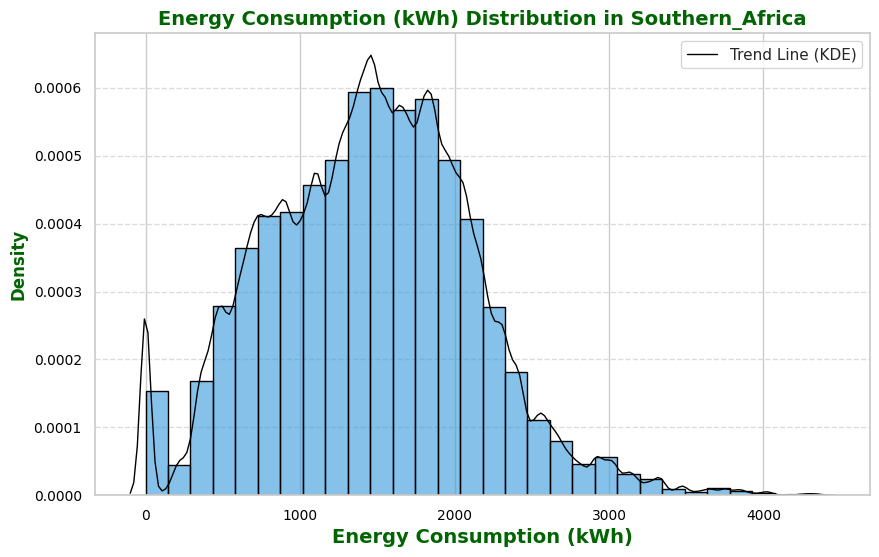

In [ ]:
selected_region = "Southern_Africa"
df_filtered = df[df["Region"] == selected_region]


energy_columns = [f'kwh.min_{year}' for year in range(2001, 2020)]
energy_data = df_filtered[energy_columns].values.flatten()  # Convert to 1D array

energy_data = energy_data[~np.isnan(energy_data)]

plt.figure(figsize=(10, 6))
sns.histplot(energy_data, bins=30, color="#3498db", edgecolor="black", alpha=0.6, stat="density")
sns.kdeplot(energy_data, color="black", linewidth=1, label="Trend Line (KDE)")

plt.title(f"Energy Consumption (kWh) Distribution in {selected_region}", fontsize=14, fontweight="bold", color="darkgreen")
plt.xlabel("Energy Consumption (kWh)", fontsize=14, color="darkgreen",fontweight="bold")
plt.ylabel("Density", fontsize=12, color="darkgreen",fontweight="bold")
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=10,color='black')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

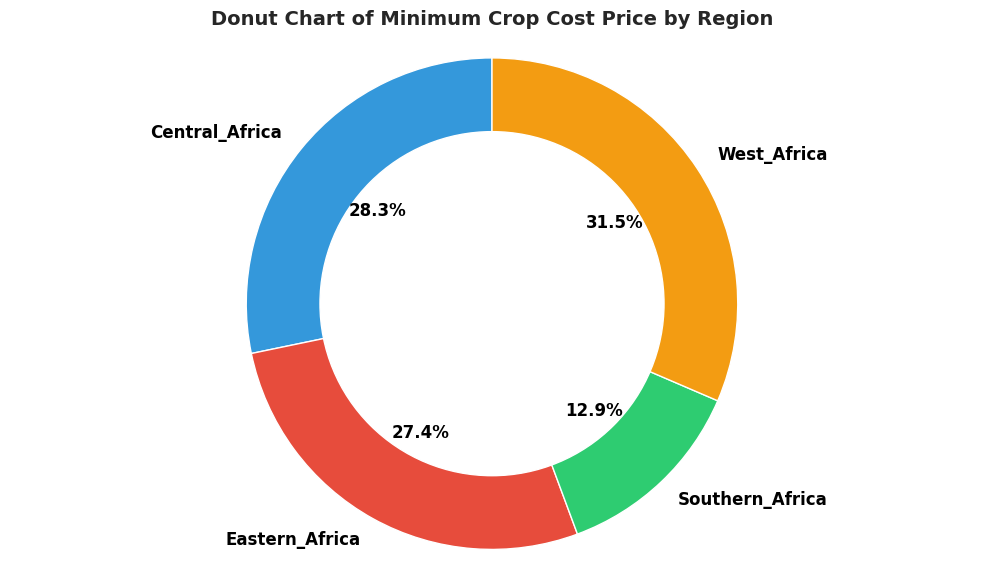

In [ ]:

min_cost_data = df.groupby('Region')['Crop_price_min'].min().reset_index()
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

plt.figure(figsize=(10, 6))
plt.pie(min_cost_data['Crop_price_min'], labels=min_cost_data['Region'], autopct='%1.1f%%', startangle=90,textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},colors=colors)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')
plt.title("Donut Chart of Minimum Crop Cost Price by Region", fontsize=14, fontweight="bold")
plt.tight_layout()

plt.show()


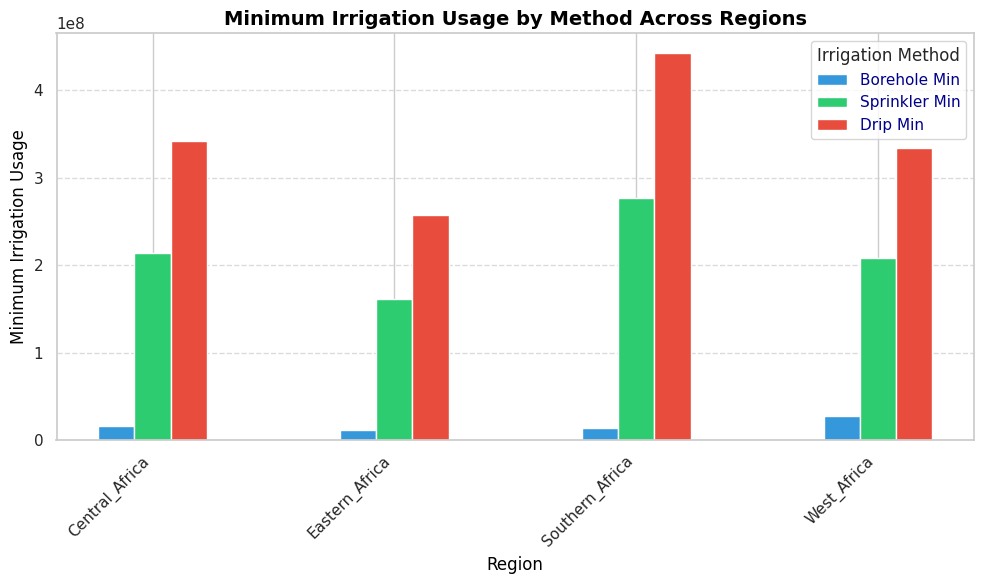

In [ ]:

df_region = df.groupby('Region')[['borehole_min', 'sprinkler_min', 'Drip_min']].sum().reset_index()

# Define bar width and positions
bar_width = 0.15
regions = df_region['Region']
x = range(len(regions))

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, df_region['borehole_min'], width=bar_width, label='Borehole Min', color='#3498db')
plt.bar([pos + bar_width for pos in x], df_region['sprinkler_min'], width=bar_width, label='Sprinkler Min', color='#2ecc71')
plt.bar([pos + 2 * bar_width for pos in x], df_region['Drip_min'], width=bar_width, label='Drip Min', color='#e74c3c')

# Labels and title
plt.xlabel("Region", fontsize=12,color='black')
plt.ylabel("Minimum Irrigation Usage", fontsize=12,color='black')
plt.title("Minimum Irrigation Usage by Method Across Regions", fontsize=14, fontweight='bold',color='black')
plt.xticks([pos + bar_width for pos in x], regions, rotation=45, ha='right')

# Legend and grid
plt.legend(title="Irrigation Method", labelcolor='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
